<a href="https://colab.research.google.com/github/mmahoney045/Store-Item-Demand-Forecasting-Challenge/blob/main/Store_Item_Demand_Forecasting_Challenge_(mahoney).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install -q kaggle


# **Downloading the Dataset:**

Downloading the dataset for "**Store Item Demand Forecasting Challenge**" directly from Kaggle. [https://www.kaggle.com/c/demand-forecasting-kernels-only/data](https://)



In [ ]:
from google.colab import files
files.upload()

In [3]:
! mkdir ~/.kaggle

In [4]:
! cp kaggle.json ~/.kaggle/

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
! chmod 600 ~/.kaggle/kaggle.json

In [7]:
! kaggle datasets list

ref                                                         title                                              size  lastUpdated          downloadCount  
----------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  
gpreda/reddit-vaccine-myths                                 Reddit Vaccine Myths                              237KB  2021-12-12 11:59:54          18511  
crowww/a-large-scale-fish-dataset                           A Large Scale Fish Dataset                          3GB  2021-04-28 17:03:01          11174  
imsparsh/musicnet-dataset                                   MusicNet Dataset                                   22GB  2021-02-18 14:12:19           5719  
dhruvildave/wikibooks-dataset                               Wikibooks Dataset                                   2GB  2021-10-22 10:48:21           3944  
nickuzmenkov/nih-chest-xrays-tfrecords                      NIH Chest X-rays

In [8]:
! kaggle competitions download -c demand-forecasting-kernels-only

  0% 0.00/3.06M [00:00<?, ?B/s]
100% 3.06M/3.06M [00:00<00:00, 28.3MB/s]
  0% 0.00/385k [00:00<?, ?B/s]
100% 385k/385k [00:00<00:00, 134MB/s]
  0% 0.00/952k [00:00<?, ?B/s]
100% 952k/952k [00:00<00:00, 133MB/s]


In [9]:
! unzip train.csv.zip -d train

Archive:  train.csv.zip
  inflating: train/train.csv         


# **Exploratory Data Analysis (EDA)**

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
df_train = pd.read_csv('/content/train/train.csv')

In [12]:
df_test = pd.read_csv('/content/test.csv')

In [13]:
df_train[:5]

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10


In [14]:
df_train.isnull().sum()

date     0
store    0
item     0
sales    0
dtype: int64

In [15]:
df_test.isnull().sum()

id       0
date     0
store    0
item     0
dtype: int64

In [16]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   date    913000 non-null  object
 1   store   913000 non-null  int64 
 2   item    913000 non-null  int64 
 3   sales   913000 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 27.9+ MB


In [17]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      45000 non-null  int64 
 1   date    45000 non-null  object
 2   store   45000 non-null  int64 
 3   item    45000 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.4+ MB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3b22366150>,
      dtype=object)

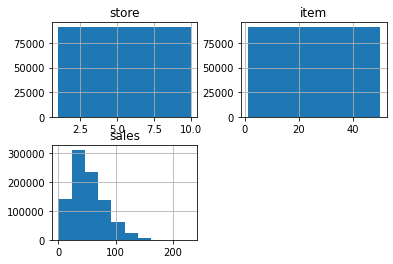

In [18]:
df_train.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3b26684c10>,
      dtype=object)

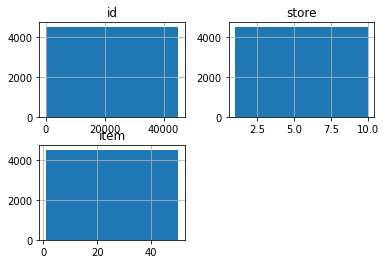

In [19]:
df_test.hist()

In [20]:
df_train.describe()

,store,item,sales
count,913000.000000,913000.000000,913000.000000
mean,5.500000,25.500000,52.250287
std,2.872283,14.430878,28.801144
min,1.000000,1.000000,0.000000
25%,3.000000,13.000000,30.000000
50%,5.500000,25.500000,47.000000
75%,8.000000,38.000000,70.000000
max,10.000000,50.000000,231.000000


In [21]:
df_test.describe()

,id,store,item
count,45000.000000,45000.000000,45000.00000
mean,22499.500000,5.500000,25.50000
std,12990.525394,2.872313,14.43103
min,0.000000,1.000000,1.00000
25%,11249.750000,3.000000,13.00000
50%,22499.500000,5.500000,25.50000
75%,33749.250000,8.000000,38.00000
max,44999.000000,10.000000,50.00000


## **Distribution of sales for each item, date, and store.**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


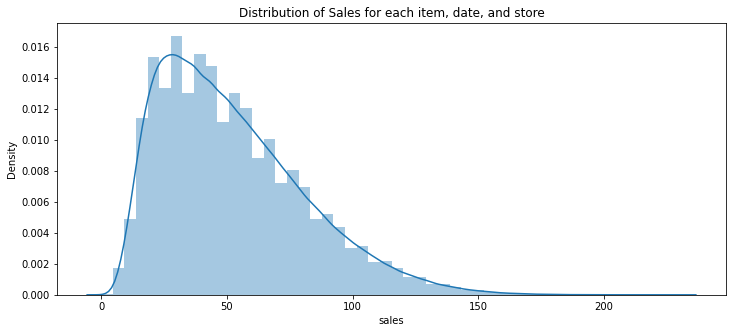

In [22]:
plt.figure(figsize=(12,5))
plt.title("Distribution of Sales for each item, date, and store")
sales_plot = sns.distplot(df_train['sales'])

In [23]:
df_train.head()

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10


In [24]:
df_train.date = pd.to_datetime(df_train.date, format='%Y-%m-%d')
df_train.date

0        2013-01-01
1        2013-01-02
2        2013-01-03
3        2013-01-04
4        2013-01-05
            ...    
912995   2017-12-27
912996   2017-12-28
912997   2017-12-29
912998   2017-12-30
912999   2017-12-31
Name: date, Length: 913000, dtype: datetime64[ns]

In [25]:
df_train['year'] = df_train.date.dt.year
df_train['month'] = df_train.date.dt.month
df_train['day'] = df_train.date.dt.day

In [26]:
df_train

,date,store,item,sales,year,month,day
0,2013-01-01,1,1,13,2013,1,1
1,2013-01-02,1,1,11,2013,1,2
2,2013-01-03,1,1,14,2013,1,3
3,2013-01-04,1,1,13,2013,1,4
4,2013-01-05,1,1,10,2013,1,5
...,...,...,...,...,...,...,...
912995,2017-12-27,10,50,63,2017,12,27
912996,2017-12-28,10,50,59,2017,12,28
912997,2017-12-29,10,50,74,2017,12,29
912998,2017-12-30,10,50,62,2017,12,30


In [27]:
df_train = df_train.drop('date',axis=1)

In [28]:
df_train

,store,item,sales,year,month,day
0,1,1,13,2013,1,1
1,1,1,11,2013,1,2
2,1,1,14,2013,1,3
3,1,1,13,2013,1,4
4,1,1,10,2013,1,5
...,...,...,...,...,...,...
912995,10,50,63,2017,12,27
912996,10,50,59,2017,12,28
912997,10,50,74,2017,12,29
912998,10,50,62,2017,12,30


In [29]:
df_test.date = pd.to_datetime(df_test.date, format='%Y-%m-%d')

In [30]:
df_test.date

0       2018-01-01
1       2018-01-02
2       2018-01-03
3       2018-01-04
4       2018-01-05
           ...    
44995   2018-03-27
44996   2018-03-28
44997   2018-03-29
44998   2018-03-30
44999   2018-03-31
Name: date, Length: 45000, dtype: datetime64[ns]

In [31]:
df_test['year'] = df_test.date.dt.year
df_test['month'] = df_test.date.dt.month
df_test['day'] = df_test.date.dt.day

In [32]:
df_test = df_test.drop('date', axis=1)

In [33]:
df_train.year = df_train.year.astype('category')
df_train.month = df_train.month.astype('category')
df_train.day = df_train.day.astype('category')
df_train.store = df_train.store.astype('category')
df_train.item = df_train.item.astype('category')
df_train.sales = df_train.sales.astype('category')

In [34]:
df_train.dtypes

store    category
item     category
sales    category
year     category
month    category
day      category
dtype: object

In [35]:
y = pd.DataFrame()
y['sales'] = df_train['sales']
df_train = df_train.drop('sales', axis=1)

In [36]:
df_train

,store,item,year,month,day
0,1,1,2013,1,1
1,1,1,2013,1,2
2,1,1,2013,1,3
3,1,1,2013,1,4
4,1,1,2013,1,5
...,...,...,...,...,...
912995,10,50,2017,12,27
912996,10,50,2017,12,28
912997,10,50,2017,12,29
912998,10,50,2017,12,30


In [37]:
from sklearn.ensemble import RandomForestClassifier

In [38]:
model = RandomForestClassifier(n_estimators = 100, max_depth=2, random_state=0)

In [39]:
x = df_train.iloc[:,0:5]
x

,store,item,year,month,day
0,1,1,2013,1,1
1,1,1,2013,1,2
2,1,1,2013,1,3
3,1,1,2013,1,4
4,1,1,2013,1,5
...,...,...,...,...,...
912995,10,50,2017,12,27
912996,10,50,2017,12,28
912997,10,50,2017,12,29
912998,10,50,2017,12,30


In [40]:
model = model.fit(x,y)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


In [41]:
for name, importance in zip(df_train.columns,model.feature_importances_):
  print(name,'=',importance)


store = 0.13709824660288825
item = 0.5670258441164927
year = 0.04904195678595184
month = 0.24677815329641
day = 5.5799198257052335e-05


In [42]:
counts_of_columns = df_train.nunique()
df_train.store.unique()

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
Categories (10, int64): [1, 2, 3, 4, ..., 7, 8, 9, 10]

In [43]:
df_train = pd.read_csv('/content/train/train.csv')

In [44]:
df_train.date = pd.to_datetime(df_train.date, format='%Y-%m-%d')

In [45]:
df_train['year'] = df_train.date.dt.year
df_train['month'] = df_train.date.dt.month
df_train['day'] = df_train.date.dt.day

In [46]:
df_train = df_train.drop('date',axis=1)

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


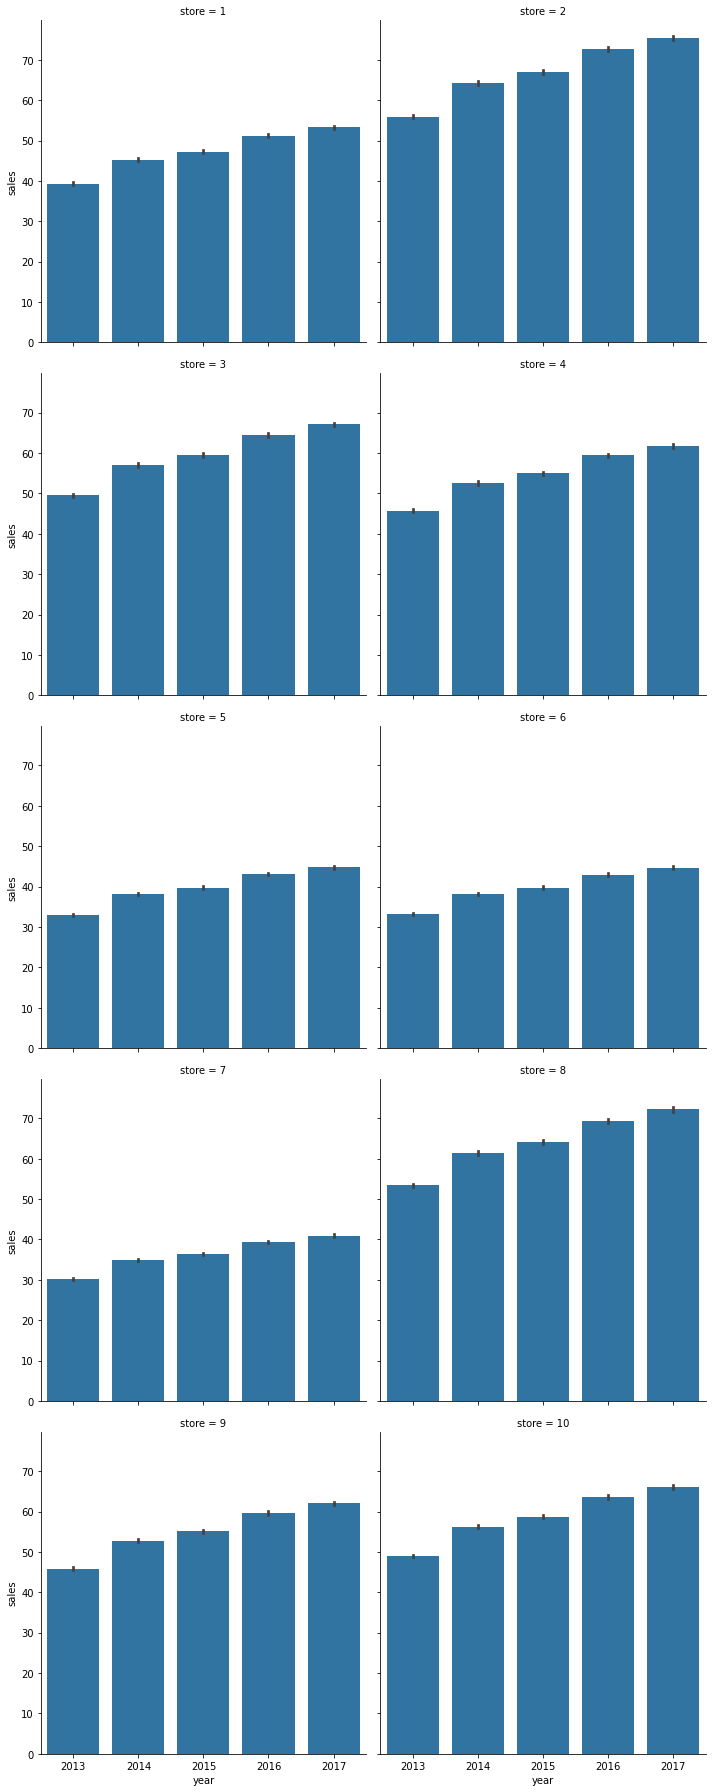

In [47]:
g = sns.FacetGrid(df_train, col='store', col_order=[1,2,3,4,5,6,7,8,9,10], col_wrap=2,size=5)
g.map(sns.barplot, "year","sales")

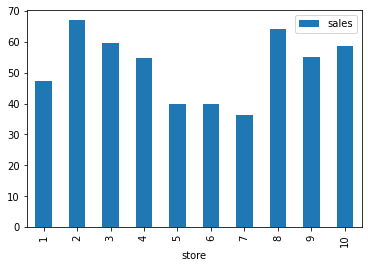

In [48]:
df_train[['sales','store']].groupby(['store']).mean().plot.bar()

/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:1373: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  return ax.bar(x, y, w, bottom=start, log=log, **kwds)


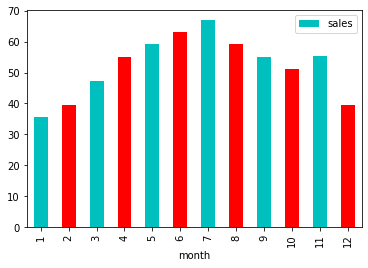

In [49]:
df_train[['sales','month']].groupby(['month']).mean().plot.bar(color='cr')

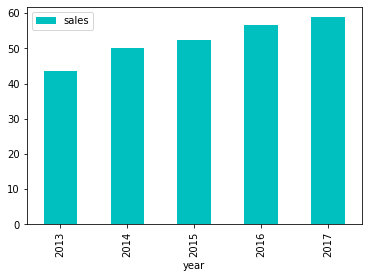

In [50]:
df_train[['sales','year']].groupby(['year']).mean().plot.bar(color='c')

In [51]:
df_train[['sales','year']].groupby(['year']).mean()

,sales
year,
2013,43.513660
2014,50.057436
2015,52.256915
2016,56.596503
2017,58.815014


In [52]:
df_train[['sales','year']].groupby(['year']).sum()

,sales
year,
2013,7941243
2014,9135482
2015,9536887
2016,10357160
2017,10733740


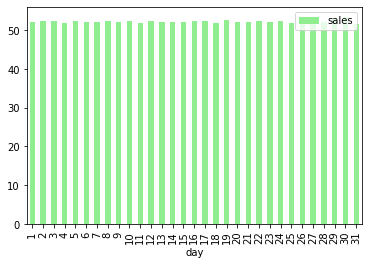

In [53]:
df_train[['sales','day']].groupby(['day']).mean().plot.bar(color='lightgreen')

# **Store Analysis: top 5 item sales for each store**


In [54]:
for i in range(1,11):
  n = df_train.loc[df_train['store']==i]
  store_info = n[['sales','item']].groupby(['item']).mean().sort_values(by='sales',ascending=False).head(5)
  display("Top 5 Item Sales in Store:",i, store_info)

'Top 5 Item Sales in Store:'

1

,sales
item,
15,79.680723
28,79.566813
18,76.345564
13,76.159365
38,73.344469


'Top 5 Item Sales in Store:'

2

,sales
item,
28,112.638007
15,112.578861
18,108.117196
13,107.903067
25,103.426068


'Top 5 Item Sales in Store:'

3

,sales
item,
15,100.423330
28,100.143483
13,96.214677
18,96.090909
38,91.871851


'Top 5 Item Sales in Store:'

4

,sales
item,
15,92.653888
28,92.552574
13,88.604600
18,88.501643
25,85.022453


'Top 5 Item Sales in Store:'

5

,sales
item,
15,66.987404
28,66.980832
13,64.395947
18,64.080504
45,61.427163


'Top 5 Item Sales in Store:'

6

,sales
item,
15,66.668675
28,66.460570
13,64.324754
18,63.725630
25,61.364184


'Top 5 Item Sales in Store:'

7

,sales
item,
15,61.139102
28,61.104053
18,58.745893
13,58.547645
25,56.398686


'Top 5 Item Sales in Store:'

8

,sales
item,
15,108.047645
28,107.813253
18,103.820372
13,103.819825
25,99.244797


'Top 5 Item Sales in Store:'

9

,sales
item,
15,93.137459
28,92.787514
18,88.610624
13,88.511501
25,85.136911


'Top 5 Item Sales in Store:'

10

,sales
item,
15,98.990690
28,98.766156
18,94.719606
13,94.684556
45,90.690581


# **Preprocessing Data**

In [55]:
print(df_test)
print(df_train)

          id  store  item  year  month  day
0          0      1     1  2018      1    1
1          1      1     1  2018      1    2
2          2      1     1  2018      1    3
3          3      1     1  2018      1    4
4          4      1     1  2018      1    5
...      ...    ...   ...   ...    ...  ...
44995  44995     10    50  2018      3   27
44996  44996     10    50  2018      3   28
44997  44997     10    50  2018      3   29
44998  44998     10    50  2018      3   30
44999  44999     10    50  2018      3   31

[45000 rows x 6 columns]
        store  item  sales  year  month  day
0           1     1     13  2013      1    1
1           1     1     11  2013      1    2
2           1     1     14  2013      1    3
3           1     1     13  2013      1    4
4           1     1     10  2013      1    5
...       ...   ...    ...   ...    ...  ...
912995     10    50     63  2017     12   27
912996     10    50     59  2017     12   28
912997     10    50     74  2017     12  

In [56]:
df_train = df_train[['store','item','year','month','day','sales']]
x_train = np.expand_dims(df_train.values[:,:-1],axis=2)
y_train = df_train.values[:,-1:]
print(y_train)
print(x_train)

[[13]
 [11]
 [14]
 ...
 [74]
 [62]
 [82]]
[[[   1]
  [   1]
  [2013]
  [   1]
  [   1]]

 [[   1]
  [   1]
  [2013]
  [   1]
  [   2]]

 [[   1]
  [   1]
  [2013]
  [   1]
  [   3]]

 ...

 [[  10]
  [  50]
  [2017]
  [  12]
  [  29]]

 [[  10]
  [  50]
  [2017]
  [  12]
  [  30]]

 [[  10]
  [  50]
  [2017]
  [  12]
  [  31]]]


In [86]:
print(x_train.ndim)
print(y_train.ndim)
x_test = np.expand_dims(df_test.values[:,1:], axis=2)
print(x_test.ndim)

3
2
3


In [58]:
print(x_test.shape)
print(x_train.shape)
print(y_train.shape)

(45000, 6, 1)
(913000, 5, 1)
(913000, 1)


# **Machine Learning Model Analysis**


In [66]:
from keras import optimizers
#from keras.utils import plot_model
from keras.models import Sequential
from keras.models import Model
from keras.layers import Dense, Flatten, Dropout, Conv1D, MaxPooling1D, LSTM

### **Neutral Networks**

In [60]:
from keras.optimizer_v1 import RMSprop
model_mlp = Sequential()
model_mlp.add(Dense(100,activation='relu',input_dim=x_train.shape[1]))
model_mlp.add(Dropout(0.4))
model_mlp.add(Dense(1))
adam = optimizers.adam_v2
model_mlp.compile(loss='mse',optimizer='rmsprop',metrics=['mean_squared_error'])
model_mlp.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               600       
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 101       
                                                                 
Total params: 701
Trainable params: 701
Non-trainable params: 0
_________________________________________________________________


In [61]:
history_mlp = model_mlp.fit(x_train,y_train,epochs=10,batch_size=50)

Epoch 1/10
18260/18260 [==============================] - 54s 3ms/step - loss: 1073.0405 - mean_squared_error: 1073.0405
Epoch 2/10
18260/18260 [==============================] - 52s 3ms/step - loss: 840.1202 - mean_squared_error: 840.1201
Epoch 3/10
18260/18260 [==============================] - 52s 3ms/step - loss: 832.5236 - mean_squared_error: 832.5236
Epoch 4/10
18260/18260 [==============================] - 51s 3ms/step - loss: 825.6873 - mean_squared_error: 825.6873
Epoch 5/10
18260/18260 [==============================] - 51s 3ms/step - loss: 820.8154 - mean_squared_error: 820.8154
Epoch 6/10
18260/18260 [==============================] - 51s 3ms/step - loss: 815.6498 - mean_squared_error: 815.6498
Epoch 7/10
18260/18260 [==============================] - 51s 3ms/step - loss: 810.9875 - mean_squared_error: 810.9875
Epoch 8/10
18260/18260 [==============================] - 51s 3ms/step - loss: 806.6236 - mean_squared_error: 806.6236
Epoch 9/10
18260/18260 [======================

[]

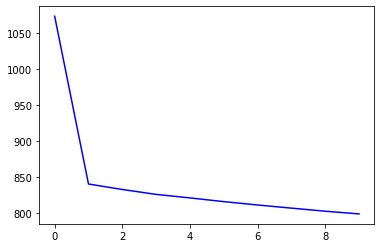

In [62]:
plt.plot(history_mlp.history['loss'],label='training loss',color='blue')
plt.plot(loc='best',shadow=True)

## **Convolutional Neural Network**

In [63]:
from keras.backend import conv1d
model_cnn = Sequential()
model_cnn.add(Conv1D(filters=64, kernel_size=2, activation='relu',input_shape=(x_train.shape[1],x_train.shape[2])))
model_cnn.add(MaxPooling1D(pool_size=2))
model_cnn.add(Flatten())
model_cnn.add(Dense(50, activation='relu'))
model_cnn.add(Dense(1))
model_cnn.compile(loss='mse',optimizer='rmsprop',metrics=['mean_squared_error'])
model_cnn.summary()



Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 4, 64)             192       
                                                                 
 max_pooling1d (MaxPooling1D  (None, 2, 64)            0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 50)                6450      
                                                                 
 dense_3 (Dense)             (None, 1)                 51        
                                                                 
Total params: 6,693
Trainable params: 6,693
Non-trainable params: 0
____________________________________________________

In [64]:
cnn_history = model_cnn.fit(x_train,y_train,epochs=10,verbose=2)

Epoch 1/10
28532/28532 - 99s - loss: 734.9598 - mean_squared_error: 734.9598 - 99s/epoch - 3ms/step
Epoch 2/10
28532/28532 - 91s - loss: 579.3653 - mean_squared_error: 579.3653 - 91s/epoch - 3ms/step
Epoch 3/10
28532/28532 - 91s - loss: 565.2139 - mean_squared_error: 565.2139 - 91s/epoch - 3ms/step
Epoch 4/10
28532/28532 - 91s - loss: 549.3151 - mean_squared_error: 549.3151 - 91s/epoch - 3ms/step
Epoch 5/10
28532/28532 - 91s - loss: 532.6539 - mean_squared_error: 532.6539 - 91s/epoch - 3ms/step
Epoch 6/10
28532/28532 - 90s - loss: 526.1258 - mean_squared_error: 526.1258 - 90s/epoch - 3ms/step
Epoch 7/10
28532/28532 - 90s - loss: 522.4624 - mean_squared_error: 522.4624 - 90s/epoch - 3ms/step
Epoch 8/10
28532/28532 - 90s - loss: 519.3323 - mean_squared_error: 519.3323 - 90s/epoch - 3ms/step
Epoch 9/10
28532/28532 - 91s - loss: 517.8616 - mean_squared_error: 517.8616 - 91s/epoch - 3ms/step
Epoch 10/10
28532/28532 - 90s - loss: 513.6553 - mean_squared_error: 513.6553 - 90s/epoch - 3ms/step

[]

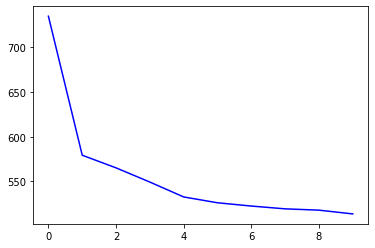

In [65]:
plt.plot(cnn_history.history['loss'],label='training loss',color='blue')
plt.plot(loc='best',shadow=True)

## **LSTM**

In [80]:
model_lstm = Sequential()
model_lstm.add(LSTM(units=64,input_shape=(x_train.shape[1],x_train.shape[2])))
model_lstm.add(Dropout(0.4))
model_lstm.add(Dense(32))
model_lstm.add(Dropout(0.3))
model_lstm.add(Dense(16))
model_lstm.add(Dense(1))
model_lstm.compile(loss='mse',optimizer='rmsprop',metrics=['mean_squared_error'])
model_lstm.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_13 (LSTM)              (None, 64)                16896     
                                                                 
 dropout_10 (Dropout)        (None, 64)                0         
                                                                 
 dense_13 (Dense)            (None, 32)                2080      
                                                                 
 dropout_11 (Dropout)        (None, 32)                0         
                                                                 
 dense_14 (Dense)            (None, 16)                528       
                                                                 
 dense_15 (Dense)            (None, 1)                 17        
                                                                 
Total params: 19,521
Trainable params: 19,521
Non-tra

In [82]:
lstm_history = model_lstm.fit(x_train,y_train,batch_size=4096,epochs=20,verbose=2)

Epoch 1/20
223/223 - 2s - loss: 643.9293 - mean_squared_error: 643.9293 - 2s/epoch - 9ms/step
Epoch 2/20
223/223 - 2s - loss: 638.1757 - mean_squared_error: 638.1757 - 2s/epoch - 8ms/step
Epoch 3/20
223/223 - 2s - loss: 632.5768 - mean_squared_error: 632.5768 - 2s/epoch - 8ms/step
Epoch 4/20
223/223 - 2s - loss: 626.6827 - mean_squared_error: 626.6827 - 2s/epoch - 8ms/step
Epoch 5/20
223/223 - 2s - loss: 620.6642 - mean_squared_error: 620.6642 - 2s/epoch - 8ms/step
Epoch 6/20
223/223 - 2s - loss: 614.8355 - mean_squared_error: 614.8355 - 2s/epoch - 8ms/step
Epoch 7/20
223/223 - 2s - loss: 608.2830 - mean_squared_error: 608.2830 - 2s/epoch - 8ms/step
Epoch 8/20
223/223 - 2s - loss: 603.4345 - mean_squared_error: 603.4345 - 2s/epoch - 8ms/step
Epoch 9/20
223/223 - 2s - loss: 596.7880 - mean_squared_error: 596.7880 - 2s/epoch - 8ms/step
Epoch 10/20
223/223 - 2s - loss: 593.1537 - mean_squared_error: 593.1537 - 2s/epoch - 8ms/step
Epoch 11/20
223/223 - 2s - loss: 587.7821 - mean_squared_er

[]

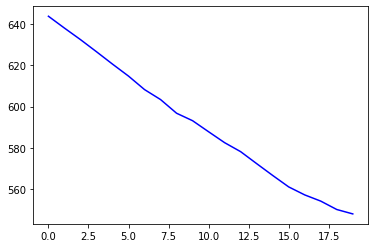

In [83]:
plt.plot(lstm_history.history['loss'],label='training loss',color='blue')
plt.plot(loc='best',shadow=True)

In [87]:
model_lstm.predict(x_test)

array([[17.954111],
       [17.863216],
       [17.82365 ],
       ...,
       [44.22764 ],
       [44.428066],
       [44.643948]], dtype=float32)

In [ ]:
predict = model_lstm.predict(x_test)